In [1]:
import pandas as pd
import torch
import torch.nn.functional as f

C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
text = "Tokenizing text is a core task of NLP"

In [3]:
tokenized_text = list(text)

In [4]:
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P']


In [5]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [6]:
token2idx

{' ': 0,
 'L': 1,
 'N': 2,
 'P': 3,
 'T': 4,
 'a': 5,
 'c': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'i': 10,
 'k': 11,
 'n': 12,
 'o': 13,
 'r': 14,
 's': 15,
 't': 16,
 'x': 17,
 'z': 18}

In [7]:
input_ids = [token2idx[token] for token in tokenized_text]

In [8]:
print(input_ids)

[4, 13, 11, 7, 12, 10, 18, 10, 12, 9, 0, 16, 7, 17, 16, 0, 10, 15, 0, 5, 0, 6, 13, 14, 7, 0, 16, 5, 15, 11, 0, 13, 8, 0, 2, 1, 3]


In [10]:
categorical_df = pd.DataFrame({"Name": ["Bumlebee", "optimum Prime", "Megatron"], "Label ID": [0,1,2]})

In [11]:
categorical_df

,Name,Label ID
0,Bumlebee,0
1,optimum Prime,1
2,Megatron,2


In [12]:
pd.get_dummies(categorical_df["Name"])

,Bumlebee,Megatron,optimum Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [13]:
input_ids = torch.tensor(input_ids)

In [14]:
one_hot_encodings = f.one_hot(input_ids, num_classes = len(token2idx))

In [15]:
one_hot_encodings.shape

torch.Size([37, 19])

In [16]:
print(tokenized_text[0])
print(input_ids[0])
print(one_hot_encodings[0])

T
tensor(4)
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [17]:
tokenized_text = text.split()

In [18]:
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP']


In [19]:
from transformers import AutoTokenizer

In [20]:
model_ckpt = "distilbert-base-uncased"

In [21]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [22]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [23]:
print(tokenizer)

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


In [24]:
from transformers import DistilBertTokenizer

In [25]:
distibert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [26]:
distibert_tokenizer

DistilBertTokenizer(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [27]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [28]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [29]:
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '[SEP]']


In [30]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp [SEP]


In [31]:
tokenizer.vocab_size

30522

In [32]:
tokenizer.model_max_length

512

In [33]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [34]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [36]:
import datasets

In [37]:
from transformers import AutoModel

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [39]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"input tensor shape : {inputs['input_ids'].size()}")

input tensor shape : torch.Size([1, 6])


In [40]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [41]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [42]:
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k,v in batch.items()
    if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [43]:
from datasets import load_dataset

In [44]:
from datasets import list_datasets

In [45]:
all_datasets = list_datasets()

C:\Users\Vasantha\AppData\Local\Temp\ipykernel_27556\374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [46]:
print(len(all_datasets))
print(all_datasets[:10])

47232
['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [47]:
emotions = load_dataset("emotion")

No config specified, defaulting to: emotion/split
Found cached dataset emotion (C:/Users/Vasantha/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [48]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [49]:
train_ds= emotions["train"]
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [50]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


In [51]:
emotions.set_format(type="pandas")

In [52]:
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [53]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [54]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [55]:
import matplotlib.pyplot as plt

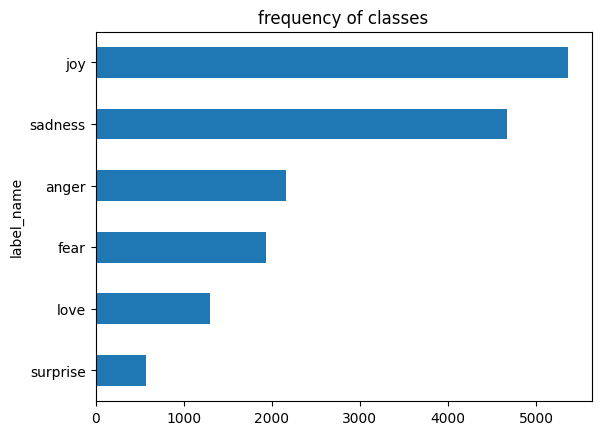

In [56]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("frequency of classes")
plt.show()

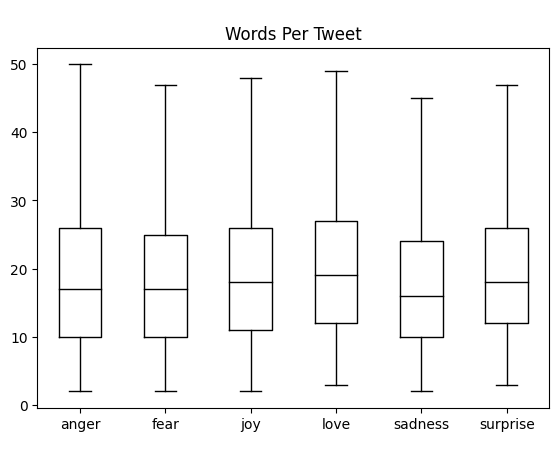

In [57]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle(" ")
plt.xlabel(" ")
plt.show()

In [58]:
emotions.reset_format()

In [59]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [60]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [61]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at C:\Users\Vasantha\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-85d3ad1d6a647925.arrow
Loading cached processed dataset at C:\Users\Vasantha\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-fa092a43ff905e7f.arrow
Loading cached processed dataset at C:\Users\Vasantha\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-27953bb8ffdc9f13.arrow


In [62]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [63]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [64]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [65]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [66]:
import numpy as np

In [67]:
x_train = np.array(emotions_hidden["train"]["hidden_state"])
x_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
x_train.shape, x_valid.shape

((16000, 768), (2000, 768))

In [68]:
from umap import UMAP


C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\umap\dist

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
x_scaled =MinMaxScaler().fit_transform(x_train)
mapper = UMAP(n_components=2, metric="cosine").fit(x_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,3.966610,6.690475,0
1,-3.407559,5.637872,0
2,4.976719,3.140960,3
3,-2.598820,3.569150,2
4,-3.585187,3.752628,3


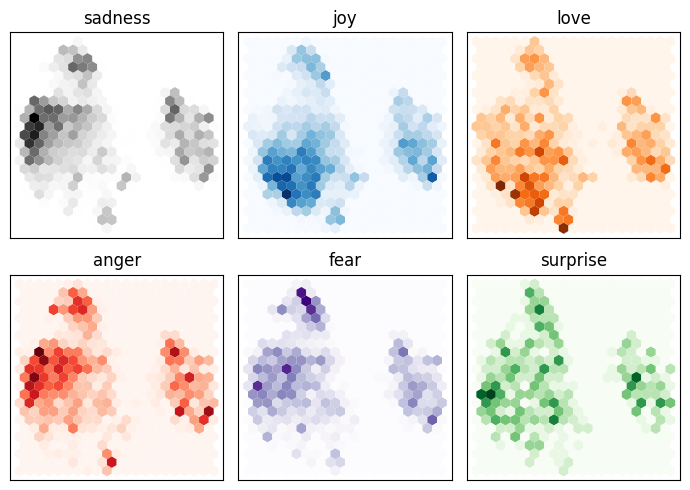

In [71]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps= ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label=={i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                  gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_valid, y_valid)

0.6335

In [74]:
from sklearn.dummy import DummyClassifier

In [75]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_valid, y_valid)

0.352

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

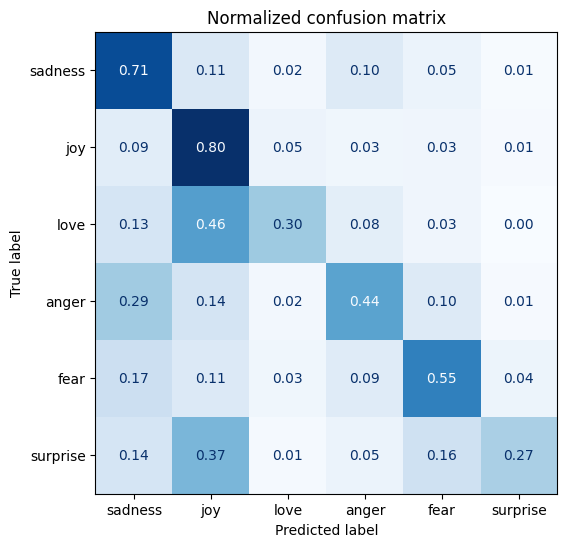

In [77]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [78]:
from transformers import AutoModelForSequenceClassification

In [79]:
num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [80]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [81]:
from sklearn.metrics import accuracy_score, f1_score

In [82]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [83]:
from huggingface_hub import notebook_login

In [84]:
notebook_login()

In [85]:
from transformers import Trainer, TrainingArguments

In [86]:
batch_size = 64
logging_steps = len(emotions_encoded["train"])//batch_size

In [87]:
model_name = f"{model_ckpt}-finetuned-emotion"

In [88]:
model_name

'distilbert-base-uncased-finetuned-emotion'

In [89]:
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [90]:
pip install accelerate>=0.20.1

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
pip install transformers[torch]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
pip install transformers[torch] -U

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import torch 

In [96]:
from transformers import Trainer

In [100]:
trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

Cloning https://huggingface.co/Vasantha-Ai/distilbert-base-uncased-finetuned-emotion into local empty directory.


In [101]:
trainer.train();

C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.822900,0.311621,0.905500,0.905300
2,0.249500,0.218077,0.923000,0.922550


In [102]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [103]:
preds_output.metrics

{'test_loss': 0.21807681024074554,
 'test_accuracy': 0.923,
 'test_f1': 0.9225503948700453,
 'test_runtime': 94.4578,
 'test_samples_per_second': 21.173,
 'test_steps_per_second': 0.339}

In [105]:
y_preds = np.argmax(preds_output.predictions, axis=1)

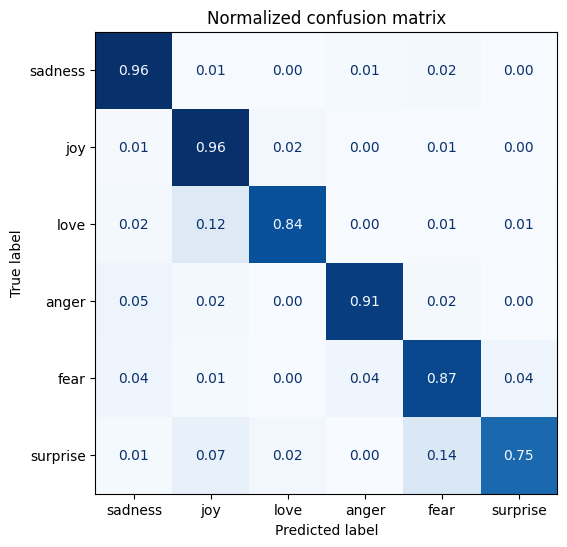

In [106]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [116]:
from torch.nn.functional import cross_entropy

In [117]:
def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k,v in batch.items()
             if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                            reduction="none")
        return{"loss": loss.cpu().numpy(),
              "predicted_label" : pred_label.cpu().numpy()}

In [118]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])


In [119]:
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [120]:
emotions_encoded.set_format("pandas")
cols=["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [121]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.542886
1950,i as representative of everything thats wrong ...,surprise,sadness,5.185991
1274,i am going to several holiday parties and i ca...,joy,sadness,5.123217
882,i feel badly about reneging on my commitment t...,love,sadness,5.098053
1683,i had applied for a job and they had assured m...,anger,joy,5.029492
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.953260
1963,i called myself pro life and voted for perry w...,joy,sadness,4.834764
1111,im lazy my characters fall into categories of ...,joy,fear,4.819077
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.760380
465,i would eventually go in to these stores but i...,joy,fear,4.679036


In [122]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.017004
1263,i feel this way about blake lively,joy,joy,0.017030
11,i was dribbling on mums coffee table looking o...,joy,joy,0.017299
1636,i feel so lucky that my mom is alive and i get...,joy,joy,0.017611
702,i only find out that they are looking and feel...,joy,joy,0.017613
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.017759
451,i feel unusually mellow not having to worry ab...,joy,joy,0.017795
530,i feel pretty safe but i do realize that we do...,joy,joy,0.017805
1421,i feel undeservingly lucky to be surrounded by...,joy,joy,0.017832
1329,i just sank into feeling completely satisfied ...,joy,joy,0.017840


In [125]:
pip install transformers -U

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
trainer.push_to_hub(commit_message="Training completed!")

To https://huggingface.co/Vasantha-Ai/distilbert-base-uncased-finetuned-emotion
   e43cc5b..6b064a0  main -> main



In [128]:
from transformers import pipeline

In [129]:
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"

In [130]:
classifier = pipeline("text-classification", model=model_id)

C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Vasantha\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [112]:
custom_tweet = "I saw a movie today and it was really good"

In [131]:
preds = classifier(custom_tweet, return_all_scores=True)

C:\Users\Vasantha\anaconda3\envs\nlp_project\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


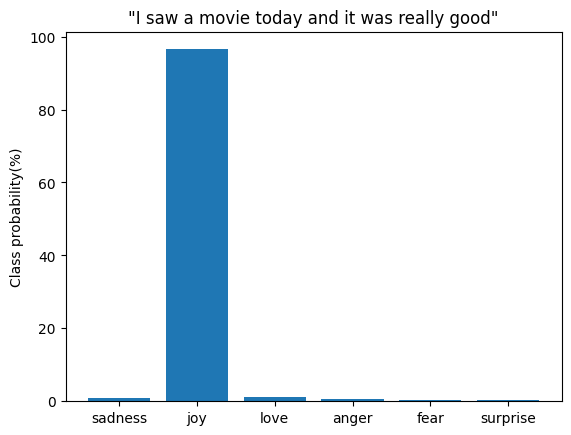

In [132]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability(%)")
plt.show()